<h2>Homework 1</h2>
<h3>Chi Ngo - cngongoc</h3>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import time 
import datetime 

In [2]:
df = pd.read_csv('HW1 clv_transactions.csv')

In [3]:
df.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94


<h4>Step 1: Understand the dataset</h4>

In [4]:
df.isnull().sum()

TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64

<p>1. Since there is no null value, there is no missing value in the dataset</p>

In [5]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [6]:
print('Latest transaction date:',max(df['TransactionDate']))
print('Earliest transaction date:',min(df['TransactionDate']))

Latest transaction date: 2015-12-31 00:00:00
Earliest transaction date: 2010-01-04 00:00:00


In [7]:
(max(df['TransactionDate']) - min(df['TransactionDate'])).days

2187

<p>2. Based on the analysis above, transaction dates range from 01/04/2010 to 12/31/2015, spanning a total of 2187 days</p>

In [8]:
df['CustomerID'].unique().size

1000

<p>3. There are 1000 unique customers in the dataset</p>

In [9]:
df['Amount'].describe()

count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64

In [10]:
print('The variance is',df['Amount'].var())

The variance is 1499.5411107517461


<p>4. For the Amount field, min is -1, max is 2033. variance is 1499.54, and standard deviation is 38.72 
Since this field is about how much a customer has spent, having a -1 dollar amount is questionable, and is potential an entry error. Furthermore, the max value is significanly higher than the mean, and we have a high variance. Therefore, there may be some very large outliers. </p>

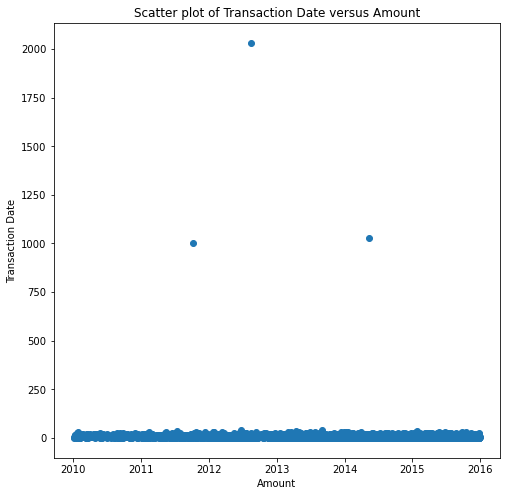

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(df['TransactionDate'],df['Amount'])
plt.title('Scatter plot of Transaction Date versus Amount')
plt.xlabel('Amount')
plt.ylabel('Transaction Date')
plt.show()

<p>5. Based on the scatter plot, transaction amount doesn't seem to increase over time, although the existence of the 3 outliers may have impacted the trend</p>

<h4>Step 2: Explore the dataset</h4>

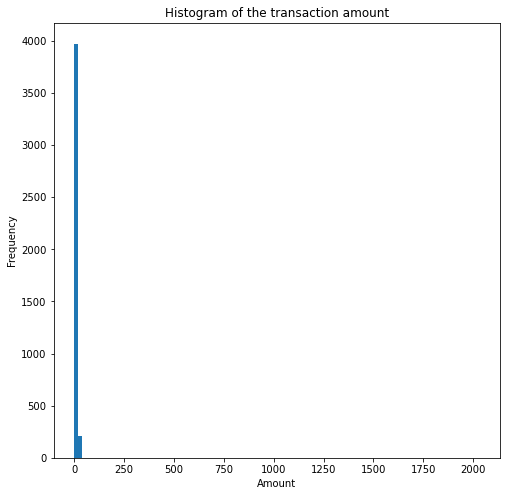

In [12]:
plt.figure(figsize=(8,8))
plt.hist(df['Amount'], bins = 100)
plt.title('Histogram of the transaction amount') 
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

<p>1. Based on the histogram, most of the data points fall below 100. However, it seems that there are some data points below 0, and a few very large ones (over 1000)</p>

In [13]:
print('Number of points above $1000:',len(df[df['Amount'] > 1000].index))

Number of points above $1000: 3


<p>2. These points are most likely data entry errors with a missing decimal points. Since it is impossible to know where the decimal point should be, and there are only 3 of these outliers, I will drop them from the dataset</p>

In [14]:
df.drop(df[df['Amount'] >= 1000].index, inplace=True)

In [15]:
print('Number of points below 0:',len(df[df['Amount'] <= 0].index))

Number of points below 0: 2


<p>2. Since there only 2 data points that are negative out of over 4000 entries, I will drop them from the dataset </p>

In [16]:
df.drop(df[df['Amount'] <= 0].index, inplace=True)

In [17]:
df['Amount'].describe()

count    4181.000000
mean        8.067580
std         6.006612
min         0.010000
25%         3.310000
50%         6.880000
75%        11.690000
max        38.350000
Name: Amount, dtype: float64

<p>After treating the outliers, we can see that standard deviation is much lower</p>

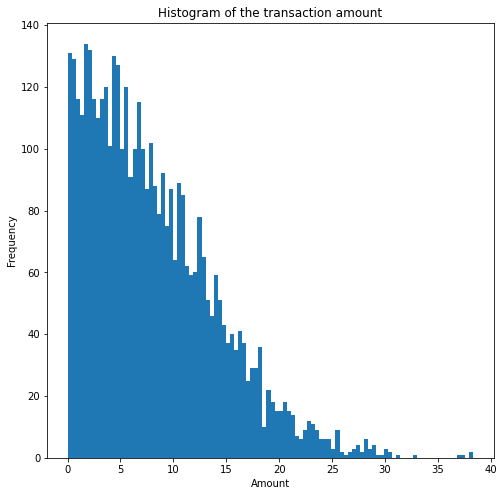

In [18]:
plt.figure(figsize=(8,8))
plt.hist(df['Amount'], bins = 100)
plt.title('Histogram of the transaction amount') 
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

<p>Reploting the transaction amount, we can see the distribution of the amount skews left</p>

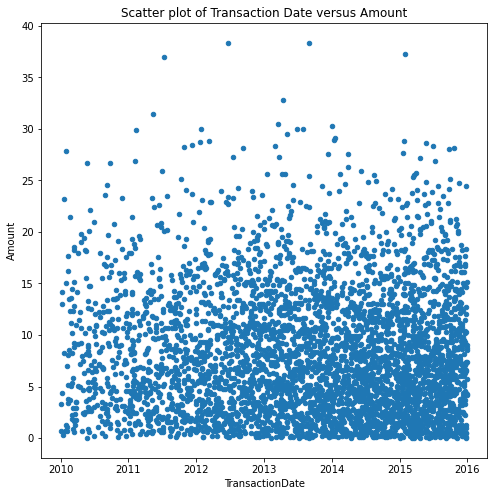

In [19]:
df.plot(kind='scatter', 
        x='TransactionDate', 
        y='Amount',
        figsize = (8,8),
        title='Scatter plot of Transaction Date versus Amount')
plt.show()

<p>Reploting the scatter plot of amount vs transaction date, there is still no relationship between the two variables</p>

<h4>Step 3: Determine origin year of customers</h4>

In [20]:
df2 = df[['CustomerID','TransactionDate']].groupby(['CustomerID']).min()

In [21]:
df2.head()

,TransactionDate
CustomerID,
1,2012-09-04
2,2012-05-15
3,2012-11-26
4,2015-07-07
5,2015-01-24


In [22]:
df2['Group'] = pd.DatetimeIndex(df2['TransactionDate']).year.astype(str)
df2 = df2.drop(columns=['TransactionDate'])

In [23]:
df = pd.merge(df, df2, how='inner',on='CustomerID')

In [24]:
df

,TransactionID,TransactionDate,CustomerID,Amount,Group
0,1,2012-09-04,1,20.26,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2012
3,4,2014-10-24,2,10.48,2012
4,5,2012-10-13,2,3.94,2012
...,...,...,...,...,...
4176,4182,2013-06-23,1000,3.86,2010
4177,4183,2011-08-07,1000,4.00,2010
4178,4184,2012-10-07,1000,18.37,2010
4179,4185,2014-01-09,1000,3.45,2010


<h4>Step 4: Calculate cumulative transaction amounts</h4>

In [25]:
Amount = pd.DataFrame({'Origin':['2010-01-01 - 2010-12-31', '2011-01-01 - 2011-12-31', '2012-01-01 - 2012-12-31', 
                                '2013-01-01 - 2013-12-31', '2014-01-01 - 2014-12-31', '2015-01-01 - 2015-12-31']})
Amount['12']=''
Amount['24']=''
Amount['36']=''
Amount['48']=''
Amount['60']=''
Amount['72']=''

In [26]:
Amount

,Origin,12,24,36,48,60,72
0,2010-01-01 - 2010-12-31,,,,,,
1,2011-01-01 - 2011-12-31,,,,,,
2,2012-01-01 - 2012-12-31,,,,,,
3,2013-01-01 - 2013-12-31,,,,,,
4,2014-01-01 - 2014-12-31,,,,,,
5,2015-01-01 - 2015-12-31,,,,,,


In [27]:
df2010 = df.loc[df['Group'] == '2010']
amt12 = df2010.loc[df2010['TransactionDate'] <= datetime.datetime.strptime('2010-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[0,'12'] = amt12

amt24 = df2010.loc[df2010['TransactionDate'] <= datetime.datetime.strptime('2011-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[0,'24'] = amt24

amt36 = df2010.loc[df2010['TransactionDate'] <= datetime.datetime.strptime('2012-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[0,'36'] = amt36

amt48 = df2010.loc[df2010['TransactionDate'] <= datetime.datetime.strptime('2013-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[0,'48'] = amt48

amt60 = df2010.loc[df2010['TransactionDate'] <= datetime.datetime.strptime('2014-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[0,'60'] = amt60

amt72 = df2010.loc[df2010['TransactionDate'] <= datetime.datetime.strptime('2015-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[0,'72'] = amt72

In [28]:
df2011 = df.loc[df['Group'] == '2011']
amt12 = df2011.loc[df2011['TransactionDate'] <= datetime.datetime.strptime('2011-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[1,'12'] = amt12

amt24 = df2011.loc[df2011['TransactionDate'] <= datetime.datetime.strptime('2012-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[1,'24'] = amt24

amt36 = df2011.loc[df2011['TransactionDate'] <= datetime.datetime.strptime('2013-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[1,'36'] = amt36

amt48 = df2011.loc[df2011['TransactionDate'] <= datetime.datetime.strptime('2014-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[1,'48'] = amt48

amt60 = df2011.loc[df2011['TransactionDate'] <= datetime.datetime.strptime('2015-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[1,'60'] = amt60

In [29]:
df2012 = df.loc[df['Group'] == '2012']
amt12 = df2012.loc[df2012['TransactionDate'] <= datetime.datetime.strptime('2012-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[2,'12'] = amt12

amt24 = df2012.loc[df2012['TransactionDate'] <= datetime.datetime.strptime('2013-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[2,'24'] = amt24

amt36 = df2012.loc[df2012['TransactionDate'] <= datetime.datetime.strptime('2014-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[2,'36'] = amt36

amt48 = df2012.loc[df2012['TransactionDate'] <= datetime.datetime.strptime('2015-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[2,'48'] = amt48

In [30]:
df2013 = df.loc[df['Group'] == '2013']
amt12 = df2013.loc[df2013['TransactionDate'] <= datetime.datetime.strptime('2013-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[3,'12'] = amt12

amt24 = df2013.loc[df2013['TransactionDate'] <= datetime.datetime.strptime('2014-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[3,'24'] = amt24

amt36 = df2013.loc[df2013['TransactionDate'] <= datetime.datetime.strptime('2015-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[3,'36'] = amt36

In [31]:
df2014 = df.loc[df['Group'] == '2014']
amt12 = df2014.loc[df2014['TransactionDate'] <= datetime.datetime.strptime('2014-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[4,'12'] = amt12

amt24 = df2014.loc[df2014['TransactionDate'] <= datetime.datetime.strptime('2015-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[4,'24'] = amt24

In [32]:
df2015 = df.loc[df['Group'] == '2015']
amt12 = df2015.loc[df2015['TransactionDate'] <= datetime.datetime.strptime('2015-12-31',"%Y-%m-%d"),'Amount'].sum()
Amount.at[5,'12'] = amt12

In [33]:
Amount.set_index('Origin', inplace=True)
Amount

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01 - 2011-12-31,2238.46,3757.9,5465.99,6703.11,7862.24,
2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,,
2013-01-01 - 2013-12-31,2179.85,3609.81,5227.75,,,
2014-01-01 - 2014-12-31,1830.85,3262.05,,,,
2015-01-01 - 2015-12-31,1912.17,,,,,


<h4>Step 5: Calculate number of customers in each group</h4>

In [34]:
NewCustomers = pd.DataFrame({'Origin':['2010-01-01 - 2010-12-31', '2011-01-01 - 2011-12-31', '2012-01-01 - 2012-12-31', 
                                        '2013-01-01 - 2013-12-31', '2014-01-01 - 2014-12-31', '2015-01-01 - 2015-12-31']})
NewCustomers['12']=''
NewCustomers['24']=''
NewCustomers['36']=''
NewCustomers['48']=''
NewCustomers['60']=''
NewCustomers['72']=''

In [35]:
NewCustomers.iloc[0,1:7] = len(df2[df2['Group'] == '2010'])
NewCustomers.iloc[1,1:6] = len(df2[df2['Group'] == '2011'])
NewCustomers.iloc[2,1:5] = len(df2[df2['Group'] == '2012'])
NewCustomers.iloc[3,1:4] = len(df2[df2['Group'] == '2013'])
NewCustomers.iloc[4,1:3] = len(df2[df2['Group'] == '2014'])
NewCustomers.iloc[5,1:2] = len(df2[df2['Group'] == '2015'])

In [36]:
NewCustomers.set_index('Origin', inplace=True)
NewCustomers

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,172,172,172,172,172,172
2011-01-01 - 2011-12-31,170,170,170,170,170,
2012-01-01 - 2012-12-31,163,163,163,163,,
2013-01-01 - 2013-12-31,180,180,180,,,
2014-01-01 - 2014-12-31,155,155,,,,
2015-01-01 - 2015-12-31,160,,,,,


<h4>Step 6: Historic CLV</h4>

In [37]:
Amount[['12','24','36','48','60','72']] = Amount[['12','24','36','48','60','72']].apply(pd.to_numeric, errors='coerce', axis=1)

In [38]:
NewCustomers[['12','24','36','48','60','72']] = NewCustomers[['12','24','36','48','60','72']].apply(pd.to_numeric, errors='coerce', axis=1)

In [39]:
HistoricCLV = round(Amount/NewCustomers,2)

In [40]:
HistoricCLV

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,13.14,21.02,30.67,38.56,46.11,52.12
2011-01-01 - 2011-12-31,13.17,22.11,32.15,39.43,46.25,NaN
2012-01-01 - 2012-12-31,13.38,23.77,32.07,39.89,NaN,NaN
2013-01-01 - 2013-12-31,12.11,20.05,29.04,NaN,NaN,NaN
2014-01-01 - 2014-12-31,11.81,21.05,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,11.95,NaN,NaN,NaN,NaN,NaN


In [41]:
HistoricCLV_transpose = HistoricCLV.transpose()

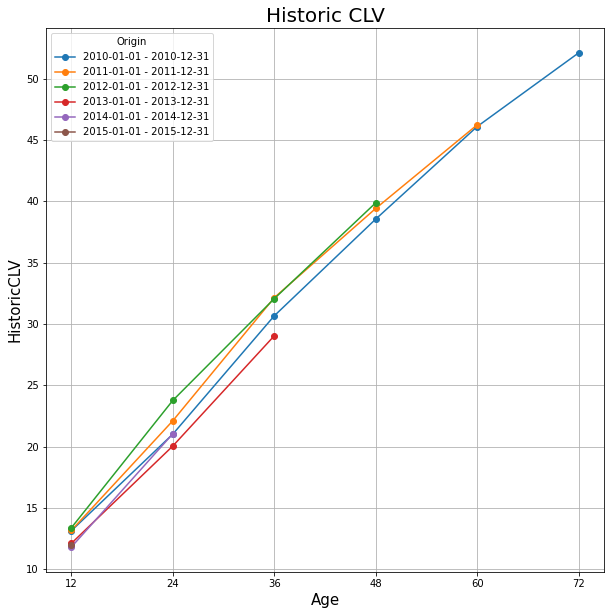

In [42]:
HistoricCLV_transpose.plot.line(figsize=(10,10),marker='o',grid=True)
plt.xlabel('Age',fontsize=15)
plt.ylabel('HistoricCLV',fontsize=15)
plt.title('Historic CLV',fontsize=20)
plt.show()

In [43]:
weightedCLV = pd.DataFrame((HistoricCLV*NewCustomers).sum(axis=0))

In [44]:
weightedCLV = round(weightedCLV/pd.DataFrame(NewCustomers.sum(axis=0)),2)
weightedCLV.rename(columns={0: 'HistoricCLV'},inplace=True)
weightedCLV.rename_axis('Age',inplace=True)

In [45]:
weightedCLV

,HistoricCLV
Age,
12,12.60
24,21.57
36,30.94
48,39.28
60,46.18
72,52.12


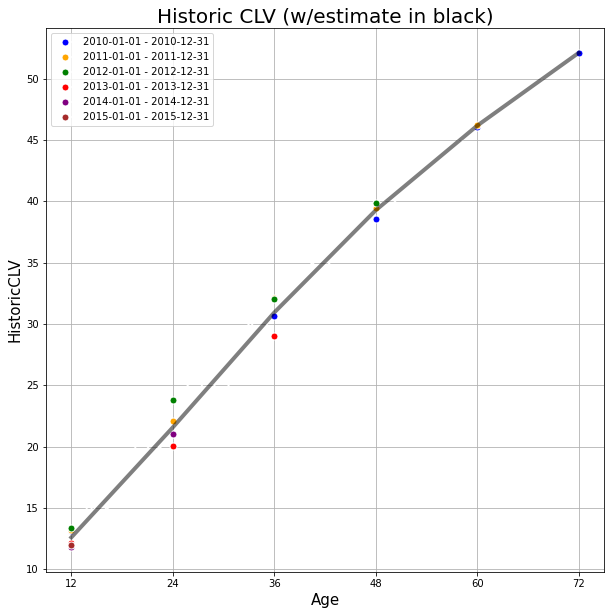

In [46]:
HistoricCLV_transpose['2010-01-01 - 2010-12-31'].plot.line(figsize=(10,10),marker='o',markerfacecolor='blue',markersize=7,color='white')
HistoricCLV_transpose['2011-01-01 - 2011-12-31'].plot.line(figsize=(10,10),marker='o',markerfacecolor='orange',markersize=7,color='white')
HistoricCLV_transpose['2012-01-01 - 2012-12-31'].plot.line(figsize=(10,10),marker='o',markerfacecolor='green',markersize=7,color='white')
HistoricCLV_transpose['2013-01-01 - 2013-12-31'].plot.line(figsize=(10,10),marker='o',markerfacecolor='red',markersize=7,color='white')
HistoricCLV_transpose['2014-01-01 - 2014-12-31'].plot.line(figsize=(10,10),marker='o',markerfacecolor='purple',markersize=7,color='white')
HistoricCLV_transpose['2015-01-01 - 2015-12-31'].plot.line(figsize=(10,10),grid=True,marker='o',markerfacecolor='brown',markersize=7,color='white')
plt.plot(weightedCLV,color='black',linewidth=4,alpha=0.5)
plt.legend()
plt.xlabel('Age',fontsize=15)
plt.ylabel('HistoricCLV',fontsize=15)
plt.title('Historic CLV (w/estimate in black)',fontsize=20)
plt.show()

<h4>Step 7: Interpreting your results</h4>

<p>Customers acquired in 2011 have spent $46.25 to date. From the graph, we can also see that different groups of customers exhibit similar pattern of spending. It also seems that the company has relatively loyal customers, and they should consider implementing a reward program to retain these customers and improve overall spending. </p>